In [21]:
#Loading the dataset of Google stocks

import pandas as pd
import tensorflow as tf
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Dense
from keras.optimizers import Adam
import math
import numpy as np
import random
from collections import deque

df = pd.read_csv('/home/ishan/Downloads/5yearsstock/GOOG(1).csv')
df.insert(0,"Time",range(len(df)),True)
df=df.drop('Date',axis=1)

In [22]:
class Agent:
    
    def __init__(self):
        self.memory = deque(maxlen=20)
        self.epsilon = 1
        self.model = self._build_model()
    
    def _build_model(self):
        model = Sequential()
        model.add(Dense(24,input_dim=4,activation='relu'))
        model.add(Dense(24, activation='relu'))
        model.add(Dense(3,activation='linear'))
        model.compile(loss='mse',optimizer = Adam(learning_rate = 0.1))
        return(model)

    def remember(self,state, action, reward, next_state, done):
        self.memory.append(state,action,reward,next_state,done)
    
    def act(self, state):
        
        eps=0.1
        #print(np.array([state]))
        pols=self.model.predict(np.array([state]))[0]
        #print(pols)
        maxi = np.argmax(pols)
        
        if maxi==0:
            action = np.random.choice([0,1,2],p=[1-eps+eps/3,eps/3,eps/3],size=(1))[0]
        elif maxi==1:
            action = np.random.choice([0,1,2],p=[eps/3,1-eps+eps/3,eps/3],size=(1))[0]
        else:
            action = np.random.choice([0,1,2],p=[eps/3,eps/3,1-eps+eps/3],size=(1))[0]
        
        return(action)

    def replay(self, batch_size):
        minibatch = random.sample(self.memory, batch_size)
        statelist=[]
        targetlist=[]
        for state, action, reward, done in mini_batch:
            target = reward
            if not done:
                target = reward + np.amax(self.model.predict(next_state))
            targetf = self.model.predict(state)
            print(targetf)
            targetf[0][action]=target
            statelist+=[state]
            targetlist+=[targetf]
            self.model.fit(np.array(statelist),np.array(targetlist), epochs=1)


In [23]:
#Training

if __name__=="__main__":
    money = []
    for e in range(10):
        state = np.array([float(df['Open'][0]),float(df['High'][0]),float(df['Low'][0]),float(df['Close'][0])])
        profit=0
        portfolio = [0,1000]
        agent=Agent()
        reward = 0
        for t in range(2487):
            done=False
            action = agent.act(state)
            nextstate = [float(df['Open'][t+1]),float(df['High'][t+1]),float(df['Low'][t+1]),float(df['Close'][t+1])]
            
            prev=portfolio[1]
            if action == 1: #buy
                portfolio[0]+=1
                portfolio[1]-=float(df['Open'][t])
            elif action == 2: #sell
                portfolio[0]-=1
                portfolio[1]+=float(df['Open'][t])
                #profit+=float(df['Open'][t])-portfolio[1]
                reward = portfolio[1]+float(df['Open'][t])*portfolio[0]
            if t == 29:
                done = True
            
            agent.memory.append([state, action, reward, nextstate, done])
            state=nextstate
        money+=[portfolio[1]]

/home/ishan/.local/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━

In [25]:
portfolio=[0,1000]
money=[1000]
profit=0
state = np.array([float(df['Open'][31]),float(df['High'][31]),float(df['Low'][31]),float(df['Close'][31])])
agaent2=Agent()
for t in range(2487,4974):
    action = agent.act(state)
    newstate = np.array([float(df['Open'][t]),float(df['High'][t]),float(df['Low'][t]),float(df['Close'][t])]) 
    prev=portfolio[1]
    if action == 1 and portfolio[1]>float(df['Open'][t]): #buy
        portfolio[0]+=1
        portfolio[1]-=float(df['Open'][t])
        #prev = prev-float(df['Open'][t])
    elif action == 2 and portfolio[0]>0: #sell
        portfolio[0]-=1
        portfolio[1]+=float(df['Open'][t])
        #profit+=float(df['Open'][t])-portfolio[1]
    state=newstate
    money+=[portfolio[1]+portfolio[0]*float(df['Open'][t])]
#print(profit)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━

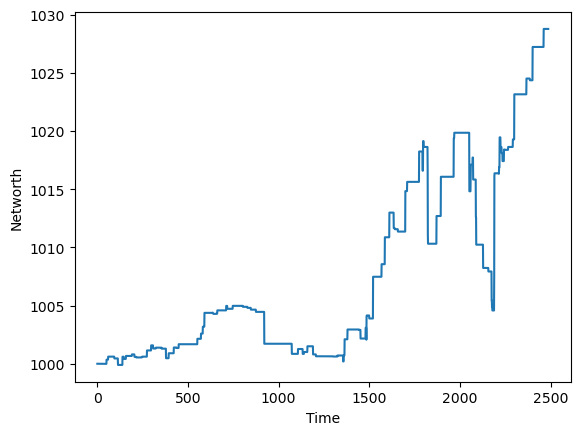

In [27]:
import matplotlib.pyplot as plt
X=range(len(money))
plt.xlabel('Time')
plt.ylabel("Networth")
plt.plot(X,money)
plt.show()